In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Read in the spikeball csv
url = 'https://raw.githubusercontent.com/ishaandey/node/master/week-8/workshop/dt/spikeball.csv'


In [3]:
# Take a look at the data


Decision trees cannot classify with the strings in the "weather" column. We will use pandas.get_dummies to one-hot encode the column. Pandas knows to only modify categorical columns. The "temperature", "friends_free", and "played_spikeball" columns will not change.

In [4]:
# One hot encode the weather column


In [7]:
# Break into training and testing
train = df.drop(10)
test = df.iloc[[10]]

In [8]:
# Divide the data into features (X) and labels (y)
X_train = train.drop('played_spikeball', axis=1)
X_test = test.drop('played_spikeball', axis=1)
y_train = train['played_spikeball']
y_test = test['played_spikeball']

In [9]:
# Fit a DecisionTreeClassifier to the training data


In [10]:
# Take a look at X_test


In [11]:
# Predict on X_test


Cool! It predicted that we wouldn't play Spikeball. Let's take a look under the hood at what's going on here.

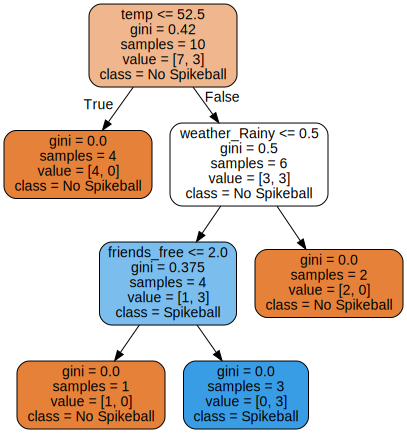

In [10]:
# Visualize the decision tree
from IPython.display import display, HTML
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(clf,
                        out_file=None,
                        feature_names=X_train.columns,
                        class_names=['No Spikeball', 'Spikeball'],
                        filled=True,
                        rounded=True))
graph

# Trying it out on real world data

We're going to use the same breast cancer dataset as before.

In [12]:
url = 'https://raw.githubusercontent.com/ishaandey/node/master/archives/algorithms/workshop/breast_cancer.csv'


In [11]:
# Clean the data
df = df.drop(columns=['id','Unnamed: 32'])

# Map from 'M' and 'B' to 1 and 0, respectively


In [13]:
# Divide into X and y and do train_test_split, ('diagnosis' is the label column)



# X_train, X_test, y_train, y_test = 

In [14]:
# Fit a DecisionTreeClassifier to the data


In [15]:
# Predict on the testing data and compare the predicted to the actual


In [16]:
# Get the accuracy score


# Feature importances
The DecisionTreeClassifier weighs different features more heavily than other when making its predictions. Let's take a look at the most important features used in this classification.

In [17]:
# Get feature importances


# Which depth?

Decision trees allow you to specify the depth that the tree is allowed to go to. Deeper trees are able to capture more details in the training set, but it may lead to overfitting. Find the accuracy of the decision tree with max depths of 1, 3, and 5.

In [25]:
# Fit a DecisionTreeClassifier with max_depth=1 and get the accuracy score


0.8947368421052632


In [35]:
# Fit a DecisionTreeClassifier with max_depth=3 and get the accuracy score


0.9473684210526315


In [31]:
# Fit a DecisionTreeClassifier with max_depth=100 and get the accuracy score


0.9473684210526315


Let's take a look at what feature the max_depth=1 tree used.

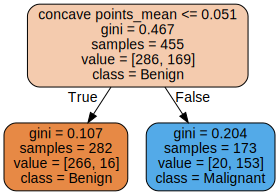

In [21]:
# Visualize max_depth=1 tree
graph = Source(export_graphviz(clf1,
                        out_file=None,
                        feature_names=X_train.columns,
                        class_names=['Benign', 'Malignant'],
                        filled=True,
                        rounded=True))
graph

This agrees with the feature importances. Cool!